In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
results_dir = "results"
charts_dir = "charts"

res_my_cro_cuda = pd.read_csv(f"{results_dir}/my_cro_cuda.csv")
res_my_cro_cpu = pd.read_csv(f"{results_dir}/my_cro_cpu.csv")
res_my_abc_cuda = pd.read_csv(f"{results_dir}/my_abc_cuda.csv")
res_my_abc_cpu = pd.read_csv(f"{results_dir}/my_abc_cpu.csv")
res_my_sa_cuda = pd.read_csv(f"{results_dir}/my_sa_cuda.csv")
res_my_sa_cpu = pd.read_csv(f"{results_dir}/my_sa_cpu.csv")

res_their_cro = pd.read_csv(f"{results_dir}/their_cro.csv")
res_their_abc = pd.read_csv(f"{results_dir}/their_abc.csv")
res_their_sa = pd.read_csv(f"{results_dir}/their_sa.csv")

In [3]:
print(
    res_their_cro["mean"][len(res_their_cro) - 1]
    / res_my_cro_cpu["mean"][len(res_their_cro) - 1]
)
print(
    res_their_abc["mean"][len(res_their_abc) - 1]
    / res_my_abc_cpu["mean"][len(res_their_abc) - 1]
)
print(
    res_their_sa["mean"][len(res_their_sa) - 1]
    / res_my_sa_cpu["mean"][len(res_their_sa) - 1]
)

5.219187707061114
4.1657342618069935
34.30452662990883


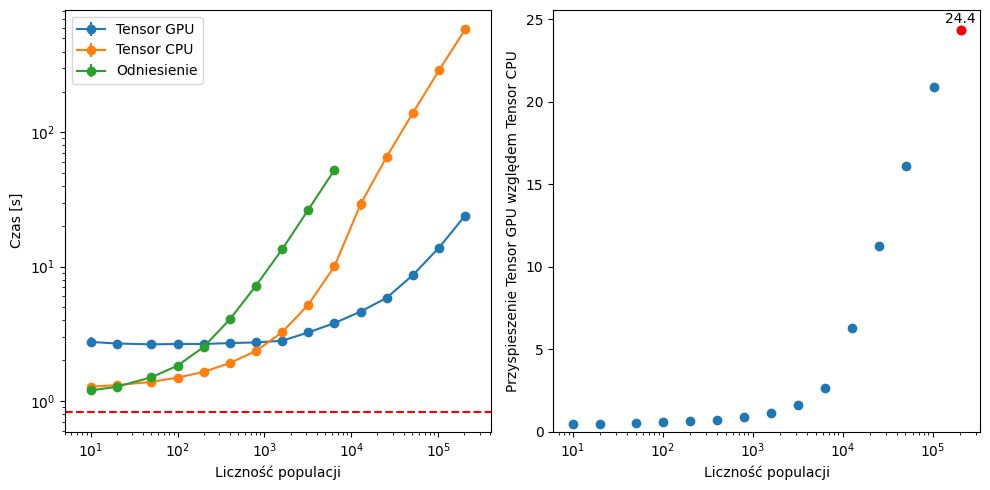

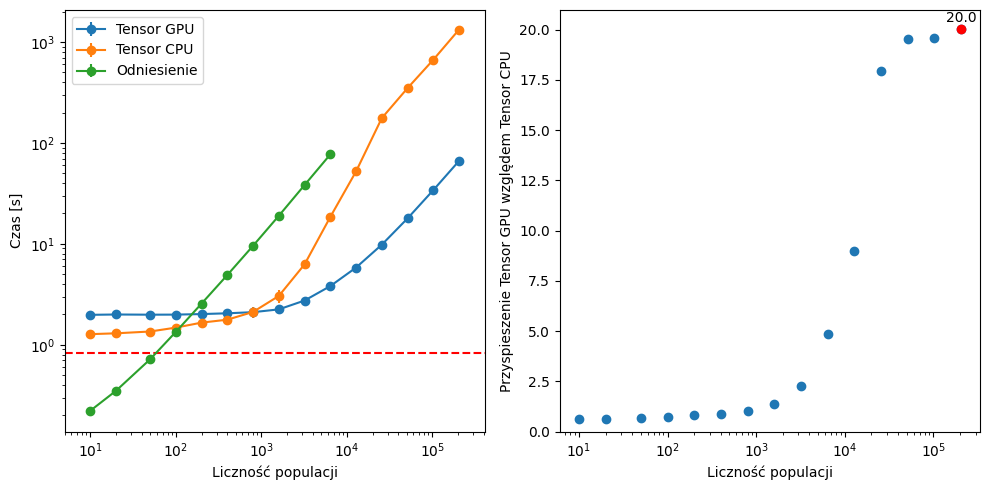

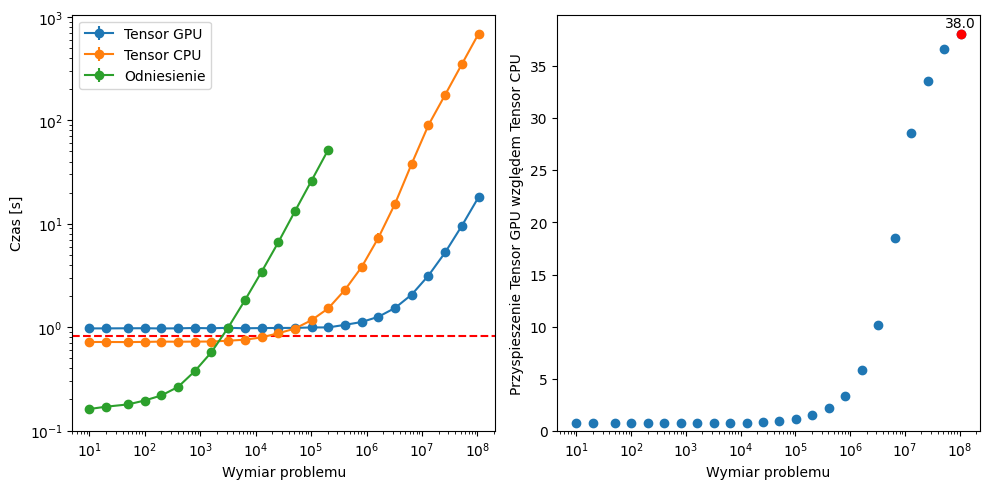

In [4]:
def plot_series(
    series: list[pd.DataFrame],
    param: str,
    xlabel: str,
    out_file: str = None,
):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs = axs.flatten()
    ax = axs[0]
    labels = ["Tensor GPU", "Tensor CPU", "Odniesienie"]

    for serie, label in zip(series, labels):
        ax.errorbar(
            serie[param],
            serie["mean"],
            yerr=serie["stddev"],
            marker="o",
            label=label,
        )

    # line for empty run
    ax.axhline(0.82, color="red", linestyle="--")

    ax.set_xlabel(xlabel)
    ax.set_ylabel("Czas [s]")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(
        min([serie[param].min() for serie in series]) / 2,
        max([serie[param].max() for serie in series]) * 2,
    )
    ax.legend()

    ax = axs[1]
    y = series[1]["mean"] / series[0]["mean"]
    ax.scatter(
        series[0][param],
        y,
    )
    ax.set_xscale("log")
    ax.set_ylim(0)

    # colour point with highest value y
    max_y = np.argmax(y)
    ax.scatter(
        series[0][param][max_y],
        y[max_y],
        color="red",
    )
    # add text with value, shift horizontally to avoid overlapping
    ax.text(
        series[0][param][max_y],
        y[max_y] * 1.01,
        f"{y[max_y]:.1f}",
        verticalalignment="bottom",
        horizontalalignment="center",
    )
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Przyspieszenie Tensor GPU względem Tensor CPU")
    fig.tight_layout()

    if out_file:
        plt.savefig(out_file)
    plt.show()


plot_series(
    [res_my_cro_cuda, res_my_cro_cpu, res_their_cro],
    param="parameter_n_population",
    xlabel="Liczność populacji",
    out_file=f"{charts_dir}/cro.pdf",
)

plot_series(
    [res_my_abc_cuda, res_my_abc_cpu, res_their_abc],
    param="parameter_n_population",
    xlabel="Liczność populacji",
    out_file=f"{charts_dir}/abc.pdf",
)


plot_series(
    [res_my_sa_cuda, res_my_sa_cpu, res_their_sa],
    param="parameter_n_dim",
    xlabel="Wymiar problemu",
    out_file=f"{charts_dir}/sa.pdf",
)

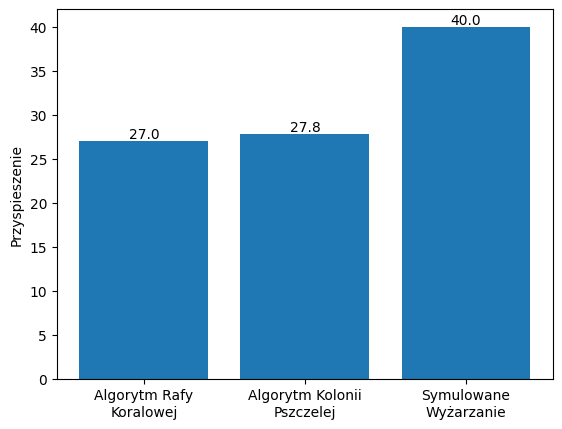

In [5]:
# CRO, ABC: 10^4x10^4
# SA: 10^8
# [CRO, ABC, SA]
time_cuda = np.array([2, 11, 1.9])
time_cpu = np.array([54, 306, 76])

time_cro_their = 72

speedup = time_cpu / time_cuda
plt.bar(
    [
        "Algorytm Rafy\nKoralowej",
        "Algorytm Kolonii\nPszczelej",
        "Symulowane\nWyżarzanie",
    ],
    speedup,
)
for i, v in enumerate(speedup):
    plt.text(i, v + 0.3, f"{round(v, 1)}", ha="center")
plt.ylabel("Przyspieszenie")
plt.show()